# Create map pickles

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import numpy as np
import cmocean
import pickle
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Load mesh file:

In [2]:
mesh       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
lon        = np.array(mesh.variables['nav_lon'])
lat        = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])
tmask      = np.array(mesh.variables['tmask'])
land_mask  = np.ma.masked_where((tmask[0,:,:,:] > 0.1) , tmask[0,:,:,:]) 

In [3]:
land_color         = '#a9a7a2'
land_outline_color = '#373736'

### Maps

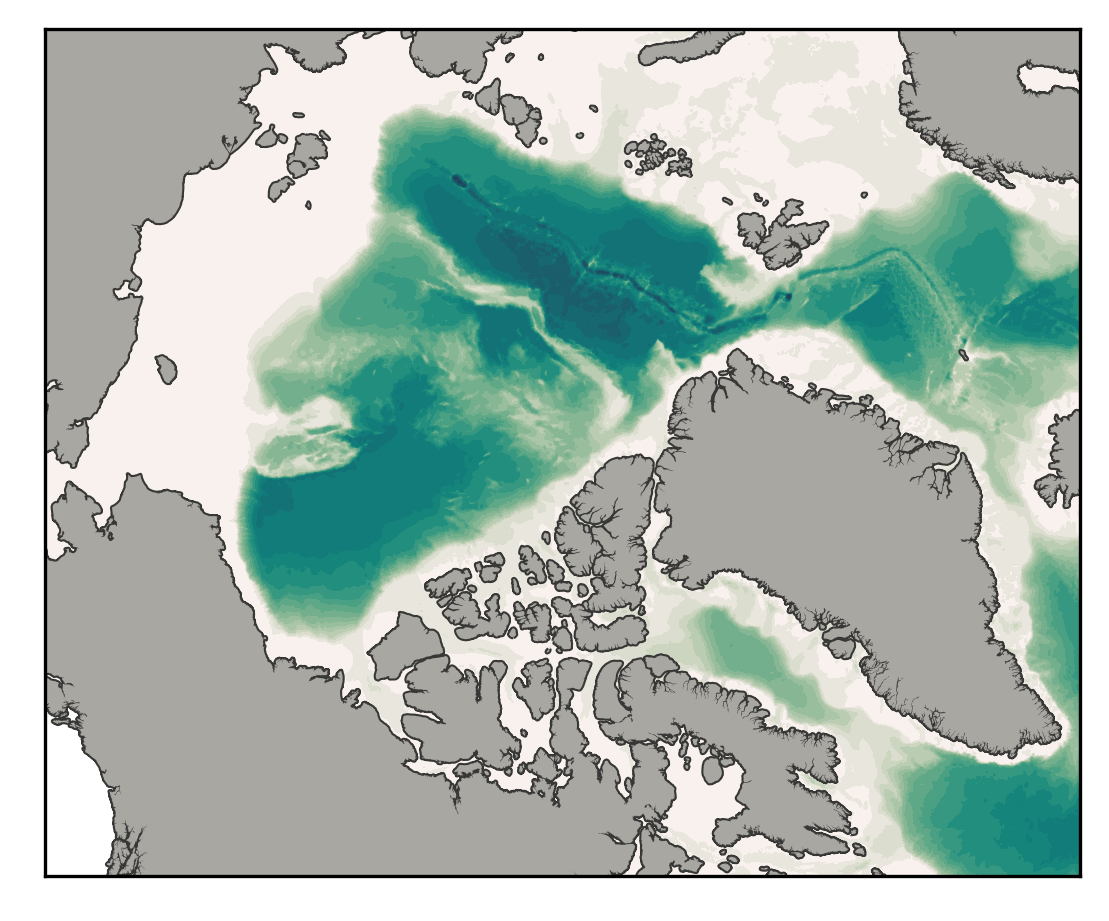

In [14]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 84, lon_0 = -95, resolution='i', width=5.5e6, height=4.5e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/AO-map.pickle','wb'))

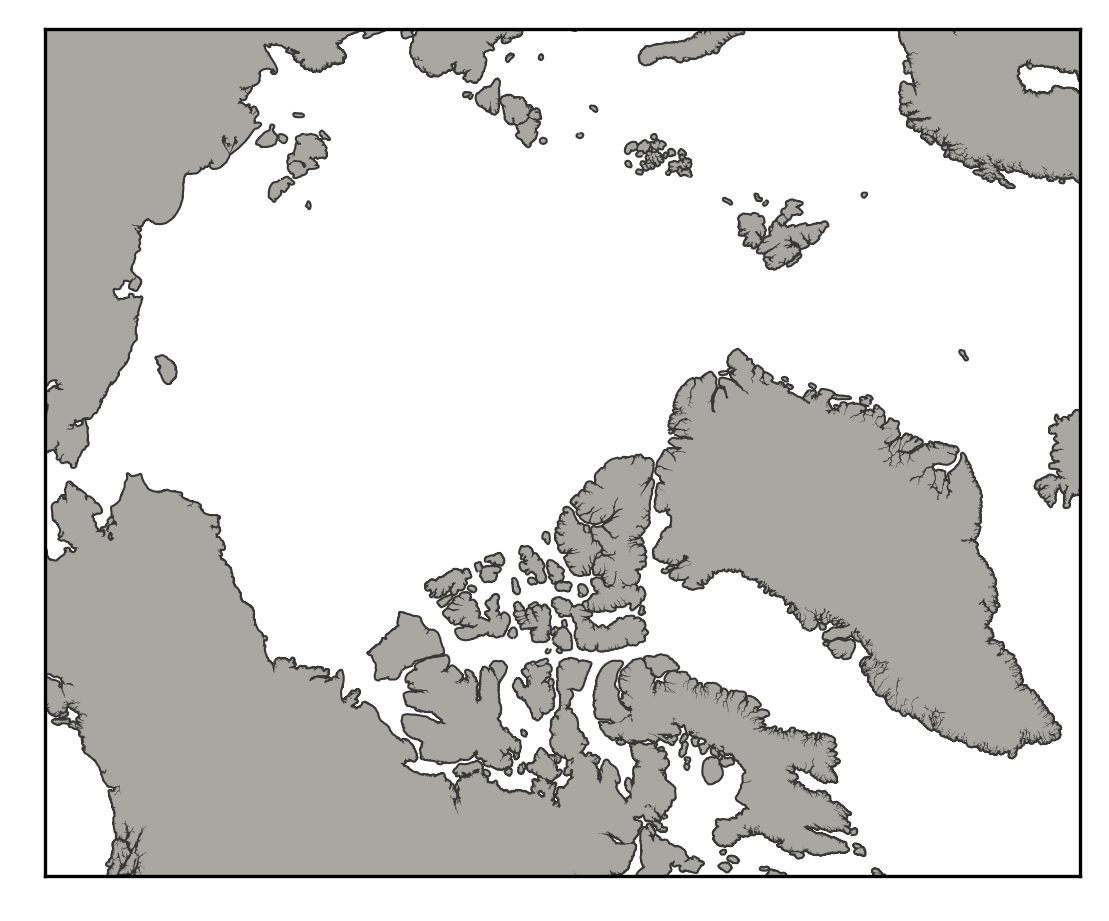

In [5]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 84, lon_0 = -95, resolution='i', width=5.5e6, height=4.5e6, ax=ax1)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# x_model, y_model = proj1(lon, lat)
# bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/AO-map-nobg.pickle','wb'))

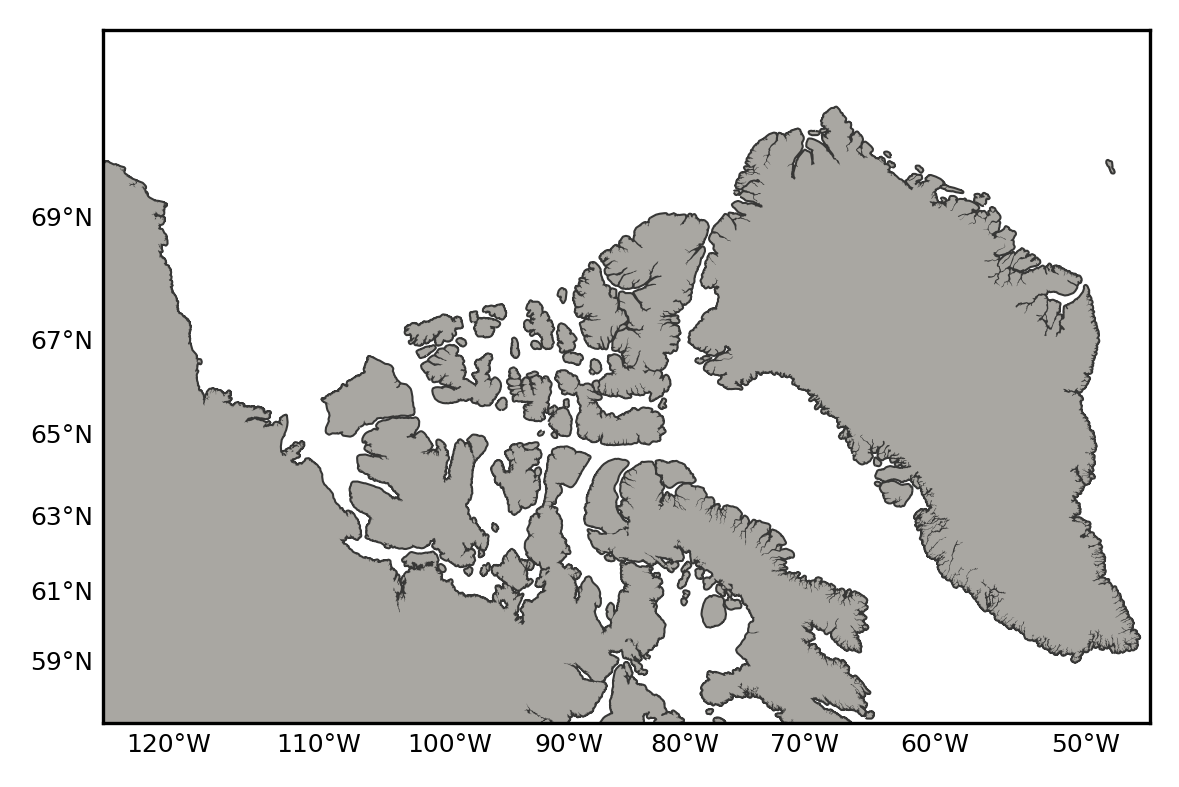

In [4]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','wb'))

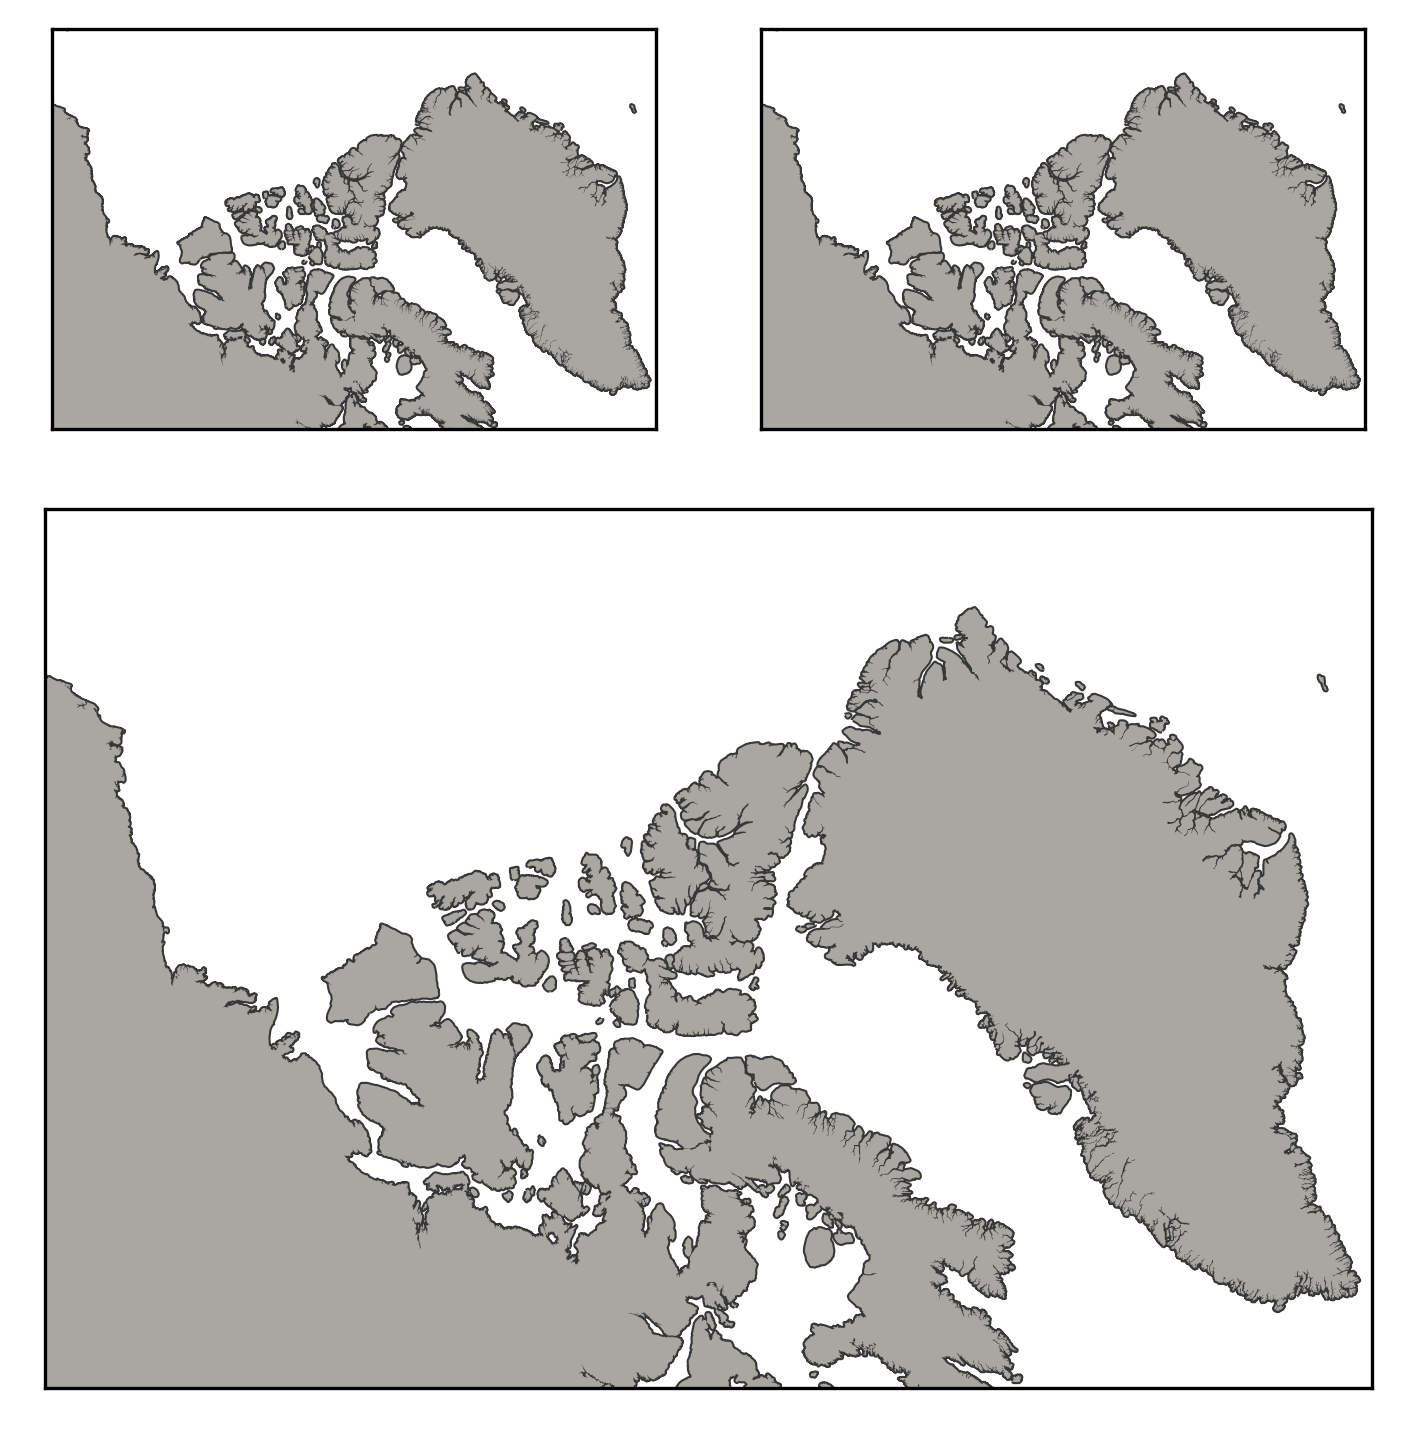

In [22]:
# fig, ax1 = plt.subplots(3,2, figsize=(9, 6), dpi=300)
fig = plt.figure(figsize=(9,6), dpi=300)
gs  = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1:3, :])

for axis in [ax1, ax2, ax3]:
    proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=axis)
    proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
    proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);
    
a1 = ax1.get_position()
a1.x0 = a1.x0 + 0.08
a1.x1 = a1.x1 + 0.08
ax1.set_position(a1)

a2 = ax2.get_position()
a2.x0 = a2.x0 - 0.08
a2.x1 = a2.x1 - 0.08
ax2.set_position(a2)

# # pickle the class instance.
pickle.dump((fig, ax1, ax2, ax3, proj1), open('/ocean/brogalla/GEOTRACES/pickles/diff-panels.pickle','wb'))

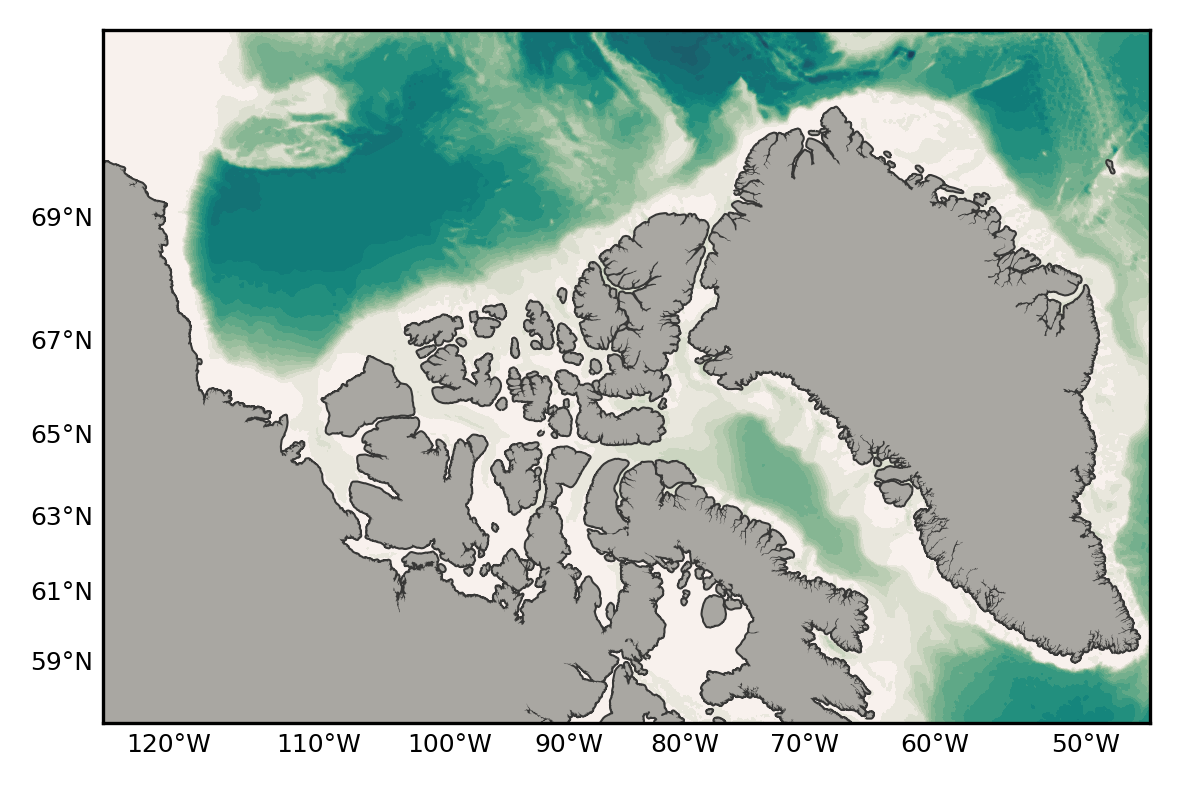

In [5]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 20, cmap=cmocean.cm.tempo, vmin=0, vmax=6000, zorder=1)

# pickle the class instance.
pickle.dump((fig, ax1, proj1), open('/ocean/brogalla/GEOTRACES/pickles/surface-land-map.pickle','wb'))

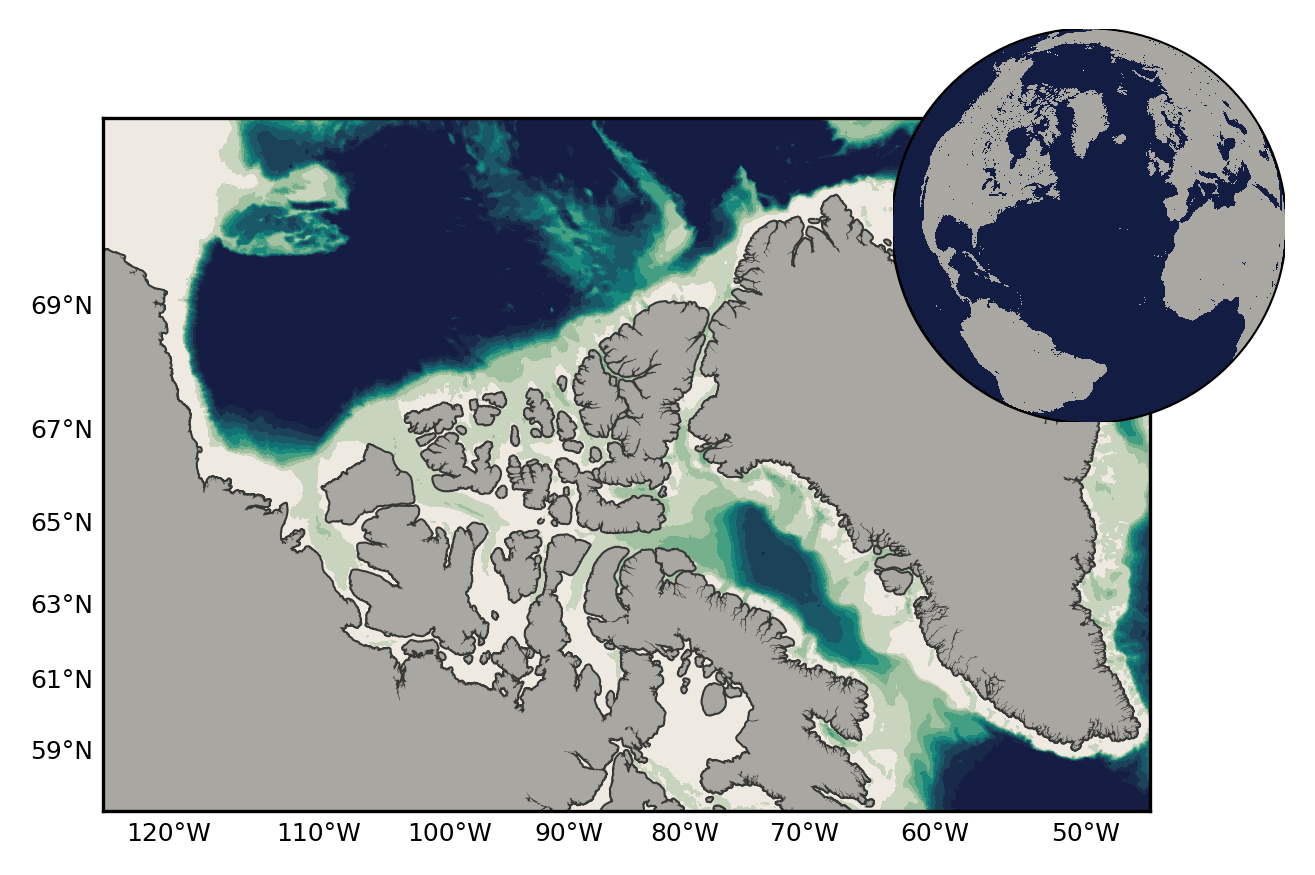

In [6]:
fig, ax1 = plt.subplots(figsize=(4.5, 3.74), dpi=300)

proj1 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1)
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=6)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=6)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

x_model, y_model = proj1(lon, lat)
bath   = proj1.contourf(x_model, y_model, mesh_bathy, 25, cmap=cmocean.cm.tempo, vmin=0, vmax=2500, zorder=1)

ax2   = fig.add_axes([0.68, 0.54, 0.35, 0.35])
proj2 = Basemap(projection='ortho',lon_0=-40,lat_0=40, resolution='h', ax=ax2)
proj2.drawmapboundary(fill_color='white')
proj2.drawlsmask(land_color = land_color, ocean_color="#131d44", resolution = 'h',zorder=2)  ##183C51 "#131d44"

# pickle the class instance.
pickle.dump((fig, ax1, proj1, ax2, proj2), open('/ocean/brogalla/GEOTRACES/pickles/M1-surface-globe.pickle','wb'))

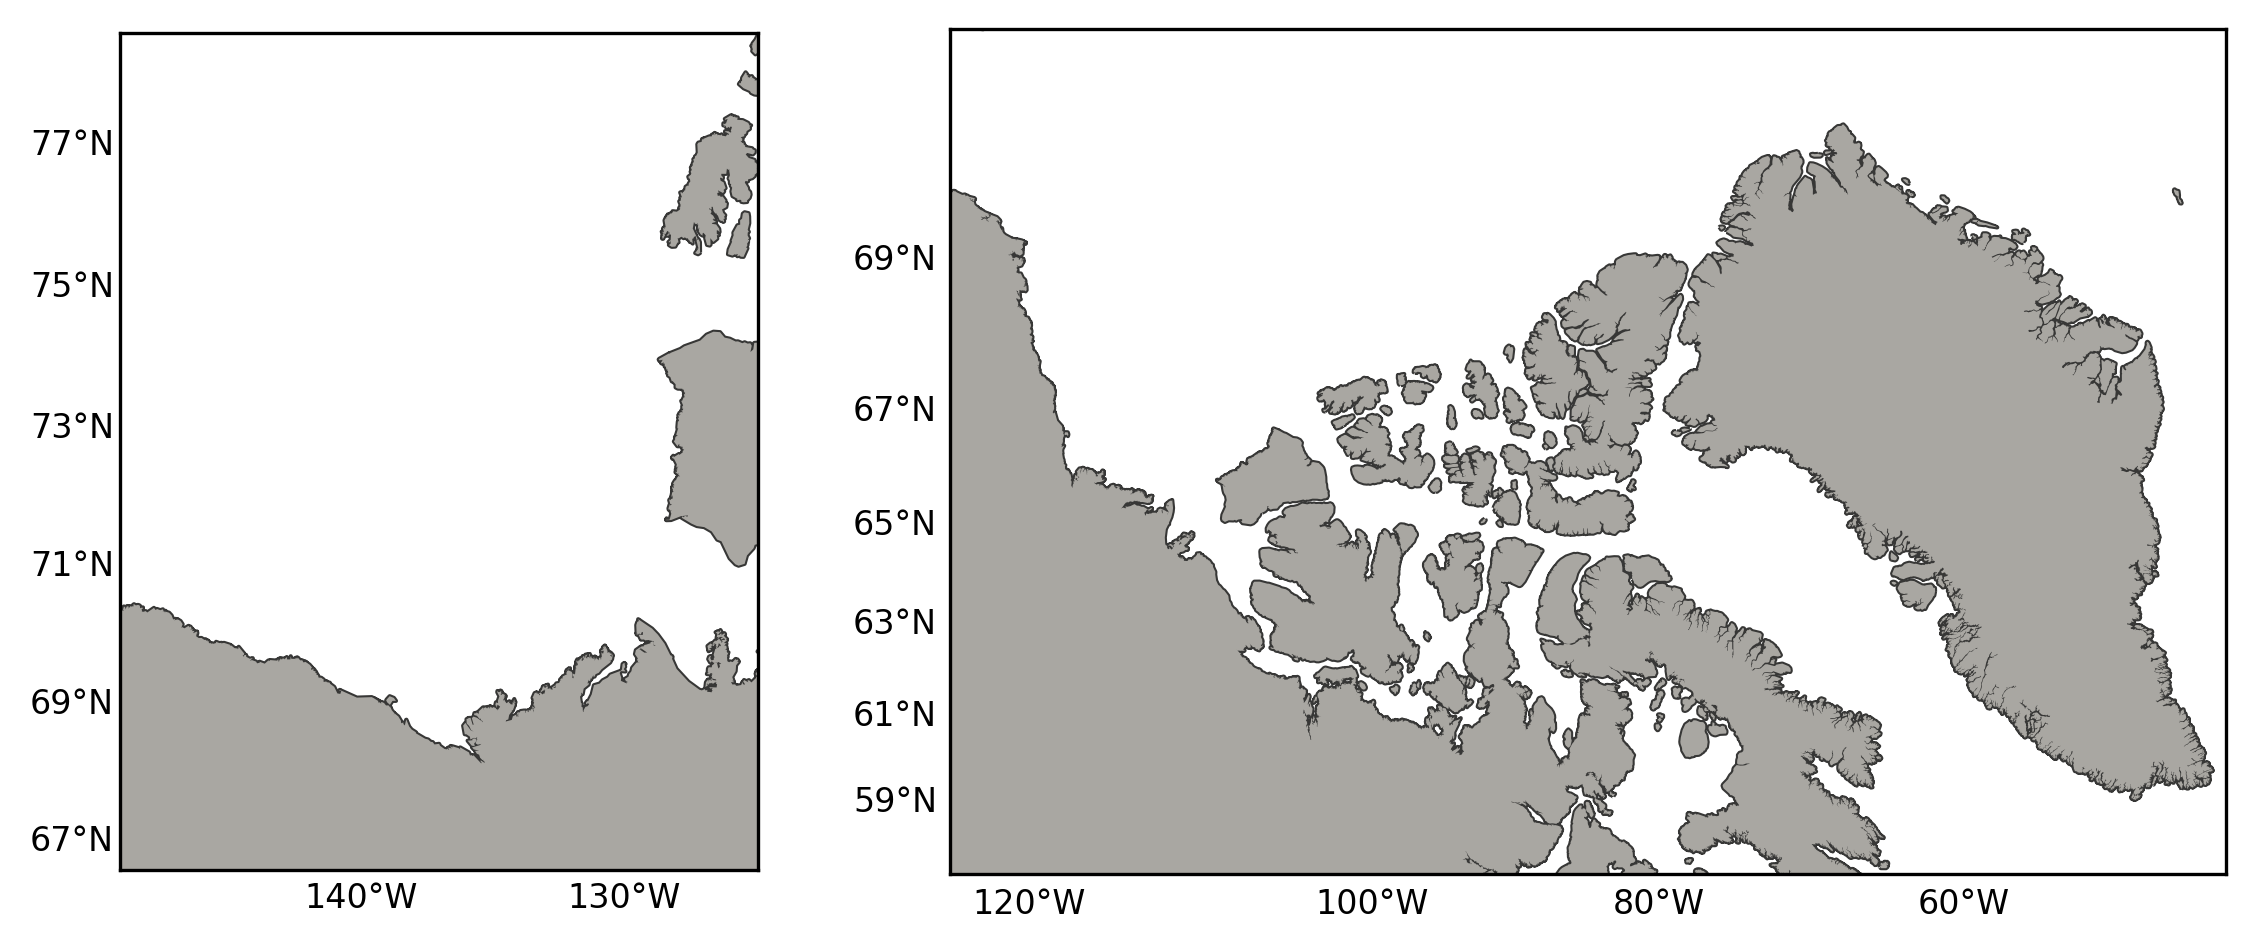

In [4]:
fig, ax1 = plt.subplots(1,2, figsize=(9.055, 3.74), dpi=300, gridspec_kw={'width_ratios': [1, 2]})

#--- Left plot ---
proj1 = Basemap(projection='stere',lat_0 = 73.3, lon_0 = -137, resolution='i', width=1.06e6, height=1.39e6, ax=ax1[0])
proj1.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj1.drawmeridians(np.arange(int(-170),int(-30),10),labels=[0,0,0,1], linewidth=0.0, fontsize=8)
proj1.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj1.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

#--- Right plot ---
proj2 = Basemap(projection='stere',lat_0 = 77.1, lon_0 = -85, resolution='i', width=4.5e6, height=2.98e6, ax=ax1[1])
proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=8)
proj2.drawmeridians(np.arange(int(-140),int(-30),20),labels=[0,0,0,1], linewidth=0.0, fontsize=8)
proj2.drawcoastlines(color=land_outline_color, linewidth=1.0)
proj2.fillcontinents(color=land_color, lake_color=land_color, zorder=2);

# pickle the class instance.
pickle.dump((fig, ax1, proj1, proj2), open('/ocean/brogalla/GEOTRACES/pickles/mn-eval-combined.pickle','wb'))